<a href="https://colab.research.google.com/github/prajwalpai/Upgrad-Assignments/blob/main/SO_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stack Overflow EDA on cloud Assignment

## Import libs

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read Data from AWS S3

In [4]:
qns = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv", encoding = "latin1")
ans = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv", encoding = "latin1")
tags = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv", encoding = "latin1")
users = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv" , encoding = "latin1")

## Check Basic Info of data

 

### Check Shape

In [1]:
qns.shape

NameError: ignored

In [5]:
qns.sample()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
389603,13813450,1191840.0,2012-12-11T04:04:49Z,NaN,1,BitShifting for uint in c#,"<p>If I want to convert 4 bytes into an int, I..."


In [6]:
ans.shape

(2014516, 6)

In [7]:
ans.sample()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
774672,13995802,1726921.0,2012-12-21T19:08:05Z,13995660,1,<p>You can try:</p>\n\n<pre><code>&lt;table&gt...


In [8]:
tags.shape

(3750994, 2)

In [9]:
tags.sample()

,Id,Tag
3590858,38784800,ruby-on-rails


In [10]:
users.shape

(1990480, 9)

### Check Sample 

In [11]:
users.sample()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
285558,285558,79883,Trey Stout,2009-03-19 05:58:13.673 UTC,2019-08-31 15:11:39.25 UTC,3498,127,2,557


## Cleanup Data


### Remove Null

#### Remove null OwnerUserId in qns

In [ ]:
qns = qns[~qns['OwnerUserId'].isnull()]

In [ ]:
qns.isnull().sum()

Id                    0
OwnerUserId           0
CreationDate          0
ClosedDate      1194522
Score                 0
Title                 0
Body                  0
dtype: int64

#### Remove null OwnerUserId in ans

In [ ]:
ans = ans[~ans['OwnerUserId'].isnull()]

In [ ]:
ans.isnull().sum()

Id              0
OwnerUserId     0
CreationDate    0
ParentId        0
Score           0
Body            0
dtype: int64

#### Remove null Tags in tags

In [ ]:
tags = tags[~tags['Tag'].isnull()]

In [ ]:
tags.isnull().sum()

Id     0
Tag    0
dtype: int64

In [ ]:
users.isnull().sum()

Unnamed: 0            0
id                    0
display_name        136
creation_date         0
last_access_date      0
reputation            0
up_votes              0
down_votes            0
views                 0
dtype: int64

#### Remove null display_name in users

In [ ]:
users = users[~users['display_name'].isnull()]

In [ ]:
users['id'].value_counts()

22656      3270
1144035    3009
29407      2144
548225     1924
115145     1813
           ... 
6296928       1
1376004       1
3868411       1
1777400       1
4098          1
Name: id, Length: 465460, dtype: int64

### Remove unnecessary Data

#### Remove "Unnamed: 0" column from users

In [ ]:
users.drop('Unnamed: 0', axis=1, inplace= True)

#### Remove the duplicate rows from users

In [ ]:
users.drop_duplicates(inplace = True)

In [ ]:
users.isnull().sum()

id                   0
display_name        24
creation_date        0
last_access_date     0
reputation           0
up_votes             0
down_votes           0
views                0
dtype: int64

In [ ]:
users

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


### Standardise Numbers

In [ ]:
qns.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


#### Making OwnerUserId an integer

In [ ]:
qns['OwnerUserId'] = qns['OwnerUserId'].astype(int)

In [ ]:
ans['OwnerUserId'] = ans['OwnerUserId'].astype(int)

In [ ]:
qns.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
ans.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
qns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Id            1249762 non-null  int64 
 1   OwnerUserId   1249762 non-null  int64 
 2   CreationDate  1249762 non-null  object
 3   ClosedDate    55240 non-null    object
 4   Score         1249762 non-null  int64 
 5   Title         1249762 non-null  object
 6   Body          1249762 non-null  object
dtypes: int64(3), object(4)
memory usage: 76.3+ MB


In [ ]:
tags.shape

(3749881, 2)

## Handling outliers 

### Outliers in Score in Questions/qns

<AxesSubplot:xlabel='Score'>

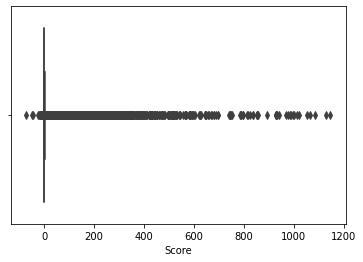

In [ ]:
sns.boxplot(qns.Score)

In [ ]:
qns = qns[qns.Score < 1200]

<AxesSubplot:xlabel='Score'>

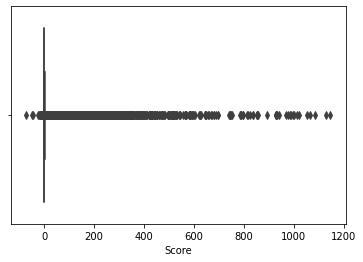

In [ ]:
sns.boxplot(qns.Score)

In [ ]:
qns.Score.describe()

count    1.249744e+06
mean     1.741049e+00
std      1.070463e+01
min     -7.300000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.147000e+03
Name: Score, dtype: float64

### Outliers in Score in Answers/ans

<AxesSubplot:xlabel='Score'>

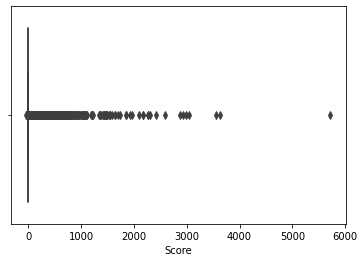

In [ ]:
sns.boxplot(ans.Score)

In [ ]:
ans = ans[ans.Score < 1100]

<AxesSubplot:xlabel='Score'>

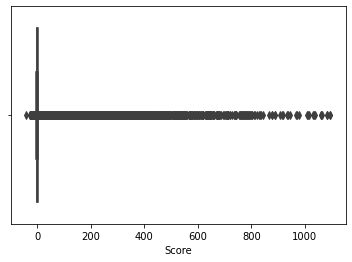

In [ ]:
sns.boxplot(ans.Score)

In [ ]:
ans.Score.describe()

count    2.001268e+06
mean     2.434043e+00
std      1.221149e+01
min     -4.200000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.095000e+03
Name: Score, dtype: float64

### Outliers in reputation in Users/users

<AxesSubplot:xlabel='reputation'>

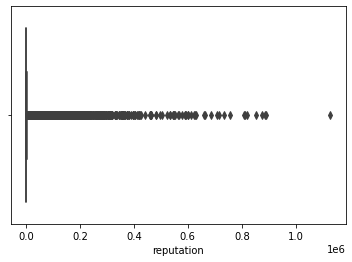

In [ ]:
sns.boxplot(users.reputation)

In [ ]:
users = users[users.reputation < 600000]

<AxesSubplot:xlabel='reputation'>

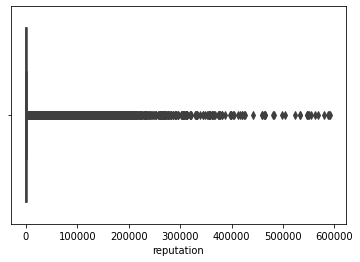

In [ ]:
sns.boxplot(users.reputation)

In [ ]:
users

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


## Prepping Join/Merge 


In [ ]:
qns.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
qns.rename(columns={'Id':'Q_Id', 'OwnerUserId':'Q_OwnerUserId', 'CreationDate':'Q_CreationDate','ClosedDate':'Q_ClosedDate' }, inplace=True)
qns.rename(columns={'Score':'Q_Score', 'Title':'Q_Title', 'Body':'Q_Body' }, inplace=True)

### Renaming Questions columns with Q identifier

In [ ]:
qns.head()

,Q_Id,Q_OwnerUserId,Q_CreationDate,Q_ClosedDate,Q_Score,Q_Title,Q_Body
0,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
ans.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


###  Renaming Answers columns with A identifier

In [ ]:
ans.rename(columns={'Id':'A_Id', 'OwnerUserId':'A_OwnerUserId', 'CreationDate':'A_CreationDate' }, inplace=True)
ans.rename(columns={'ParentId':'Q_Id','Score':'A_Score', 'Body':'A_Body' }, inplace=True)

In [ ]:
ans.sample()

,A_Id,A_OwnerUserId,A_CreationDate,Q_Id,A_Score,A_Body
1974864,39279852,4003419,2016-09-01T19:53:07Z,39279260,1,<p>Using a CASE to calculate the rule for each...


In [ ]:
qns.sample()

,Q_Id,Q_OwnerUserId,Q_CreationDate,Q_ClosedDate,Q_Score,Q_Title,Q_Body
749860,25421400,3518947,2014-08-21T08:15:34Z,NaN,4,AngularJS error handling when resolving stuff ...,<p>I've been doing lots of research on how to ...


### Cosolidating Tags as CSV values grouped by Question ID 

**Breaking up the below commented line to make sure processor is NOT taxed**

Had initiatlly tested with tags.head(5000) and worked well but running on entire dataframe execution almost made jupyter unresponsive.

In [ ]:
#tags.groupby(['Id'])['Tag'].apply(lambda Tag: ''.join(Tag.to_string(index=False))).str.replace('(\\n)', ',').reset_index()

In [ ]:
tags2 = tags.groupby(['Id'])['Tag']

In [ ]:
tags3 = tags2.apply(lambda Tag: ''.join(Tag.to_string(index=False)))

In [ ]:
tags3.str.replace('(\\n)', ',').reset_index()

,Id,Tag
0,80,"flex, actionscript-3, air"
1,90,"svn, tortoisesvn,..."
2,120,"sql, asp.net, sitemap"
3,180,"algorithm, language-agnostic, ..."
4,260,"c#, .net,..."
...,...,...
1264209,40143210,"php, .htaccess"
1264210,40143300,google-bigquery
1264211,40143340,"android, android-studio"
1264212,40143360,"javascript, vue.js"


In [ ]:
tags=tags3.str.replace('(\\n)', ',').reset_index()

In [ ]:
tags

,Id,Tag
0,80,"flex, actionscript-3, air"
1,90,"svn, tortoisesvn,..."
2,120,"sql, asp.net, sitemap"
3,180,"algorithm, language-agnostic, ..."
4,260,"c#, .net,..."
...,...,...
1264209,40143210,"php, .htaccess"
1264210,40143300,google-bigquery
1264211,40143340,"android, android-studio"
1264212,40143360,"javascript, vue.js"


In [ ]:
tags.rename(columns={'Id':'Q_Id'}, inplace= True)

In [ ]:
tags

,Q_Id,Tag
0,80,"flex, actionscript-3, air"
1,90,"svn, tortoisesvn,..."
2,120,"sql, asp.net, sitemap"
3,180,"algorithm, language-agnostic, ..."
4,260,"c#, .net,..."
...,...,...
1264209,40143210,"php, .htaccess"
1264210,40143300,google-bigquery
1264211,40143340,"android, android-studio"
1264212,40143360,"javascript, vue.js"


In [ ]:
users

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


In [ ]:
ans.sample()

,A_Id,A_OwnerUserId,A_CreationDate,Q_Id,A_Score,A_Body
9490,180345,14690,2008-10-07T20:48:49Z,180320,2,"<p>Templates are type safe. With defines, you ..."


In [ ]:
qns.sample()

,Q_Id,Q_OwnerUserId,Q_CreationDate,Q_ClosedDate,Q_Score,Q_Title,Q_Body
544954,18883970,929834,2013-09-18T23:25:02Z,NaN,0,toolkit:ListPicker is Null when trying to set ...,<p>Quite new to Windows Phone Applications.</p...


In [ ]:
tags.sample()

,Q_Id,Tag
483124,16872940,"polygon, kineticjs, tween"


In [ ]:
users.sample()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
1923005,2100779,RadoTonev,2013-02-22 20:10:30.017 UTC,2019-01-10 03:41:04.417 UTC,20,7,0,5


## Merging Questions, Answers and Tags to get a consolidated DataFrame

In [ ]:
qna = pd.merge(qns,ans,how='inner', on='Q_Id')

In [ ]:
final_df = pd.merge(qna,tags,how='inner', on='Q_Id')

In [ ]:
final_df.sample()

,Q_Id,Q_OwnerUserId,Q_CreationDate,Q_ClosedDate,Q_Score,Q_Title,Q_Body,A_Id,A_OwnerUserId,A_CreationDate,A_Score,A_Body,Tag
1718628,33847500,1815321,2015-11-21T19:14:50Z,NaN,0,Deploy to HockeyApp fails,"<p>I ran through <a href=""http://support.hocke...",35590684,5971500,2016-02-23T23:55:38Z,0,<p>did you get it to work using the extension?...,"tfs, win-universal-app, vs-tea..."


In [ ]:
users.sample()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
1975219,2885941,Viktor Molokostov,2013-10-16 10:09:17.49 UTC,2019-08-23 12:50:04.853 UTC,284,210,0,27


In [ ]:
tags1 = tags.head(5000)

## Filtering the DataFrame to select only DataScience Tagges Queries/Answers

ds_tags = Data Science Tags provided in the Assignment Objectives

In [ ]:
ds_tags=['python', 'r', 'matlab', 'sas', 'excel', 'sql']

In [ ]:
final_df = final_df[final_df.Tag.astype(str).str.contains(pat="python|matlab|sas|excel|sql|r,")]

In [ ]:
final_df = final_df.reset_index(drop=True)

In [ ]:
final_df.sample()

,Q_Id,Q_OwnerUserId,Q_CreationDate,Q_ClosedDate,Q_Score,Q_Title,Q_Body,A_Id,A_OwnerUserId,A_CreationDate,A_Score,A_Body,Tag
74374,6846580,14556,2011-07-27T15:01:45Z,NaN,6,How to bottom align two elements in a DIV elem...,"<p><img src=""http://i.stack.imgur.com/dG4ht.pn...",6846670,91612,2011-07-27T15:07:52Z,1,<p>This should work I think:</p>\n\n<p>HTML <...,"css, table, browser, html"


In [ ]:
users.sample()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
1917862,5872943,Brad Hoffman,2016-02-02 13:24:30.7 UTC,2019-08-31 14:16:44.413 UTC,44,1,0,12


## Droping off unnessary columns

In [ ]:
Cleaned_up_df = final_df[['Q_Id','Q_CreationDate','A_CreationDate','A_Id', 'A_OwnerUserId','A_Score','Tag']]

In [ ]:
Cleaned_up_df

,Q_Id,Q_CreationDate,A_CreationDate,A_Id,A_OwnerUserId,A_Score,Tag
0,120,2008-08-01T15:50:08Z,2008-09-23T22:41:11Z,124363,12734,9,"sql, asp.net, sitemap"
1,580,2008-08-02T23:30:59Z,2008-08-02T23:40:04Z,585,149,13,"sql-server, sql-server-2005, ..."
2,580,2008-08-02T23:30:59Z,2008-08-02T23:51:09Z,586,34,17,"sql-server, sql-server-2005, ..."
3,580,2008-08-02T23:30:59Z,2008-08-03T00:22:03Z,590,116,2,"sql-server, sql-server-2005, ..."
4,580,2008-08-02T23:30:59Z,2008-08-03T00:37:03Z,591,111,3,"sql-server, sql-server-2005, ..."
...,...,...,...,...,...,...,...
388241,40142380,2016-10-19T22:13:40Z,2016-10-19T23:15:05Z,40142998,6942565,0,"python, unix, split"
388242,40142550,2016-10-19T22:28:58Z,2016-10-19T22:38:05Z,40142640,4104224,1,"mysql, sql, left-join"
388243,40142860,2016-10-19T23:01:07Z,2016-10-19T23:14:50Z,40142994,1951885,0,"excel, excel-formula"
388244,40143190,2016-10-19T23:36:01Z,2016-10-19T23:38:17Z,40143212,1491895,5,"python, bash, multiline"


TO-DO 
- Check differnec in qdate and adate ( to know speed of answer)
- Add reputation to each a-user id